# Normalización Estandar 

##### Una empresa manufacturera ha utilizado fotogrametría del objeto cercano para determinar las medidas del largo de un lote de piezas automotrices que será enviado a EUA. El resultado del análisis será usado para determinar ajustes a las maquinas productoras.  

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
from glob import glob 
import statistics as st
import math as m 
import scipy as scipy

In [17]:
from scipy.stats import norm

In [270]:
import seaborn as sns

In [2]:
headers= ['symboling','normalized-loses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','lenght','widht','height','curb-weight','engine-type','num-of-culinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
fn= pd.read_csv('auto.csv',names= headers)

### Media, mediana y moda

In [100]:
fn1= fn[['lenght','widht','height']]
fn1.describe()

,lenght,widht,height
count,205.000000,205.000000,205.000000
mean,174.049268,65.907805,53.724878
std,12.337289,2.145204,2.443522
min,141.100000,60.300000,47.800000
25%,166.300000,64.100000,52.000000
50%,173.200000,65.500000,54.100000
75%,183.100000,66.900000,55.500000
max,208.100000,72.300000,59.800000


In [44]:
print(fn1['lenght'].min(),',',fn1['lenght'].max())

141.1 , 208.1


In [47]:
Rango= fn1['lenght'].max()-fn1['lenght'].min()
Rango

67.0

In [110]:
intervalos= 1+3.332*(m.log10(205))
intervalos= m.floor(intervalos)
intervalos

8

In [109]:
amplitud= Rango/intervalos
amplitud= m.floor(amplitud)
amplitud

7

### Número de intervalos (usando el método de Sturges)

In [260]:
data= fn1[['lenght']]
pd.set_option('precision',6)
datos= data[:]
k= 1+3.332*m.log10(len(datos))
numero= int(k)
if numero % 2==0:
    periodos= m.ceil(k)
else:
    periodos= int(k)
    
inf= int(datos.min())    
dif= int(datos.max())
sup= int(datos.max()+1)

interv= pd.interval_range(
    start= inf,
    end= sup,
    periods= k,
    name= 'Intervalo',
    closed= 'left')

df= pd.DataFrame(index= interv)
df['FrecAbs']= pd.cut(datos.lenght,bins= df.index).value_counts()
df['Marca']= df.index.mid
df     

,FrecAbs,Marca
Intervalo,,
"[141.0, 149.5)",3,145.25
"[149.5, 158.0)",24,153.75
"[158.0, 166.5)",25,162.25
"[166.5, 175.0)",62,170.75
"[175.0, 183.5)",40,179.25
"[183.5, 192.0)",36,187.75
"[192.0, 200.5)",12,196.25
"[200.5, 209.0)",3,204.75


### Histograma

D:\Conda\envs\geo_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


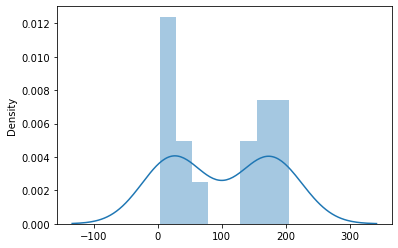

In [273]:
ax = sns.distplot(df, bins=8)

### Datos sin estandarizar

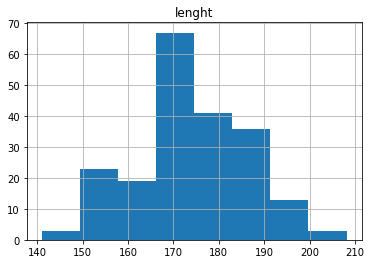

In [287]:
%matplotlib inline
hist= fn[['lenght']].hist(bins=8)

<ipython-input-289-07f551045fe8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fn1['lenght']= (fn1['lenght']-st.mean(fn1.lenght))/st.pstdev(fn1.lenght)


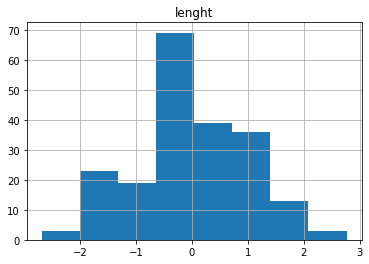

In [289]:
fn1= fn[['lenght']]
fn1['lenght']= (fn1['lenght']-st.mean(fn1.lenght))/st.pstdev(fn1.lenght)
%matplotlib inline
hist= fn1[['lenght']].hist(bins=8)

### Datos estadarizados

D:\Conda\envs\geo_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


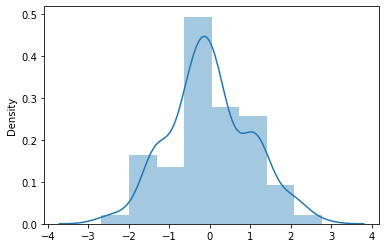

In [292]:
ax1 = sns.distplot(fn1, bins=8)

In [294]:
fn1.to_csv

,lenght
0,-0.426521
1,-0.426521
2,-0.231513
3,0.207256
4,0.207256


In [293]:
fn1.describe()

,lenght
count,2.050000e+02
mean,-9.358368e-16
std,1.002448e+00
min,-2.677244e+00
25%,-6.296552e-01
50%,-6.900603e-02
75%,7.354037e-01
max,2.766741e+00


### Valores estandarizados en un archivo csv

In [295]:
compression_opts = dict(method='zip',
                        archive_name='ValuesEst.csv')  
df.to_csv('ValuesEst.zip', index=False,
          compression=compression_opts)  